In [30]:
import pandas as pd
import numpy as np
import os
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier <- pip install xgboost
from sklearn.svm import SVC
from sklearn.svm import SVR # Support Vector Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline


In [31]:
data=pd.read_csv('C:/Users/User/machine_learning/data/btc_data.csv')
data.head(5)

,Date,priceUSD,transactions,size,sentbyaddress,difficulty,hashrate,mining_profitability,sentinusdUSD,transactionfeesUSD,...,price3rsiUSD,price7rsiUSD,price14rsiUSD,price30rsiUSD,price90rsiUSD,price3rocUSD,price7rocUSD,price14rocUSD,price30rocUSD,price90rocUSD
0,2010/07/17,0.0495,235,649.653,390,181.543,2.775561e+09,154298.0,1193.0,0.000010,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
1,2010/07/18,0.0726,248,765.285,424,181.543,1.554461e+09,401834.0,2620.0,0.000243,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
2,2010/07/19,0.0859,354,756.040,553,181.543,1.551287e+09,481473.0,4048.0,0.000022,...,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0
3,2010/07/20,0.0783,413,984.707,632,181.543,1.640430e+09,431831.0,2341.0,0.000000,...,82.751,0.0,0.0,0.0,0.0,58.099,0.0,0.0,0.0,0.0
4,2010/07/21,0.0767,256,542.483,440,181.543,1.723493e+09,460783.0,2122.0,0.000000,...,78.603,0.0,0.0,0.0,0.0,5.652,0.0,0.0,0.0,0.0


In [32]:
data.dtypes

Date              object
priceUSD         float64
transactions       int64
size             float64
sentbyaddress      int64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 737, dtype: object

In [33]:
data.isna().sum()

Date             0
priceUSD         0
transactions     0
size             0
sentbyaddress    0
                ..
price3rocUSD     0
price7rocUSD     0
price14rocUSD    0
price30rocUSD    0
price90rocUSD    0
Length: 737, dtype: int64

In [34]:
data.fillna(0, inplace=True)

In [35]:
data.describe()
data.columns

Index(['Date', 'priceUSD', 'transactions', 'size', 'sentbyaddress',
       'difficulty', 'hashrate', 'mining_profitability', 'sentinusdUSD',
       'transactionfeesUSD',
       ...
       'price3rsiUSD', 'price7rsiUSD', 'price14rsiUSD', 'price30rsiUSD',
       'price90rsiUSD', 'price3rocUSD', 'price7rocUSD', 'price14rocUSD',
       'price30rocUSD', 'price90rocUSD'],
      dtype='object', length=737)

In [36]:
data_features = data.drop("Date", axis=1)
data_features = data_features.astype(np.float64)
data_features.dtypes

priceUSD         float64
transactions     float64
size             float64
sentbyaddress    float64
difficulty       float64
                  ...   
price3rocUSD     float64
price7rocUSD     float64
price14rocUSD    float64
price30rocUSD    float64
price90rocUSD    float64
Length: 736, dtype: object

In [37]:
data_features = data_features.drop("priceUSD", axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.priceUSD, random_state =0)
scaler = MinMaxScaler()
scaler.fit(data_features)
X_scaled = scaler.transform(data_features)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    data_features, data.priceUSD, random_state =0)
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    data_features, data.priceUSD, random_state =0)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (3488, 735)
축소된 데이터 형태 : (3488, 3)


In [38]:
print(data.priceUSD)
y_som = y_train *10000
print(y_som)
print(y_train)
print(y_test)
y_train = y_som.astype(np.int64)
y_som = y_test * 10000
y_test = y_som.astype(np.int64)
print(y_train)

0          0.0495
1          0.0726
2          0.0859
3          0.0783
4          0.0767
          ...    
3483    9349.0000
3484    9394.0000
3485    9366.0000
3486    9393.0000
3487    9398.0000
Name: priceUSD, Length: 3488, dtype: float64
2803     86410000.0
768         99100.0
396        109340.0
2575     28310000.0
76            619.0
           ...     
835        106500.0
3264    108650000.0
1653      2485100.0
2607     42900000.0
2732    154760000.0
Name: priceUSD, Length: 2616, dtype: float64
2803     8641.0000
768         9.9100
396        10.9340
2575     2831.0000
76          0.0619
           ...    
835        10.6500
3264    10865.0000
1653      248.5100
2607     4290.0000
2732    15476.0000
Name: priceUSD, Length: 2616, dtype: float64
1768      233.2560
2295      685.3560
224         0.9350
45          0.0621
2452     1132.0000
           ...    
3290    10672.0000
2212      575.4430
353        13.3920
1267      834.6900
2539     2545.0000
Name: priceUSD, Length: 872, 

In [39]:
# forest_scaled = RandomForestClassifier(n_estimators = 10, random_state=2)
# forest_scaled.fit(X_train_scaled, y_train_scaled)
svc = SVC()
svc.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test, y_test)))

svc_scaled = SVC()
svc_scaled.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc_scaled.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc_scaled.score(X_test_scaled, y_test)))


훈련 세트 정확도: 0.002
테스트 세트 정확도: 0.001
훈련 세트 정확도: 0.002
테스트 세트 정확도: 0.001


In [40]:

svc_pca = SVC()
svc_pca.fit(X_train_pca, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc_pca.score(X_train_pca, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc_pca.score(X_test_pca, y_test)))

훈련 세트 정확도: 0.002
테스트 세트 정확도: 0.001


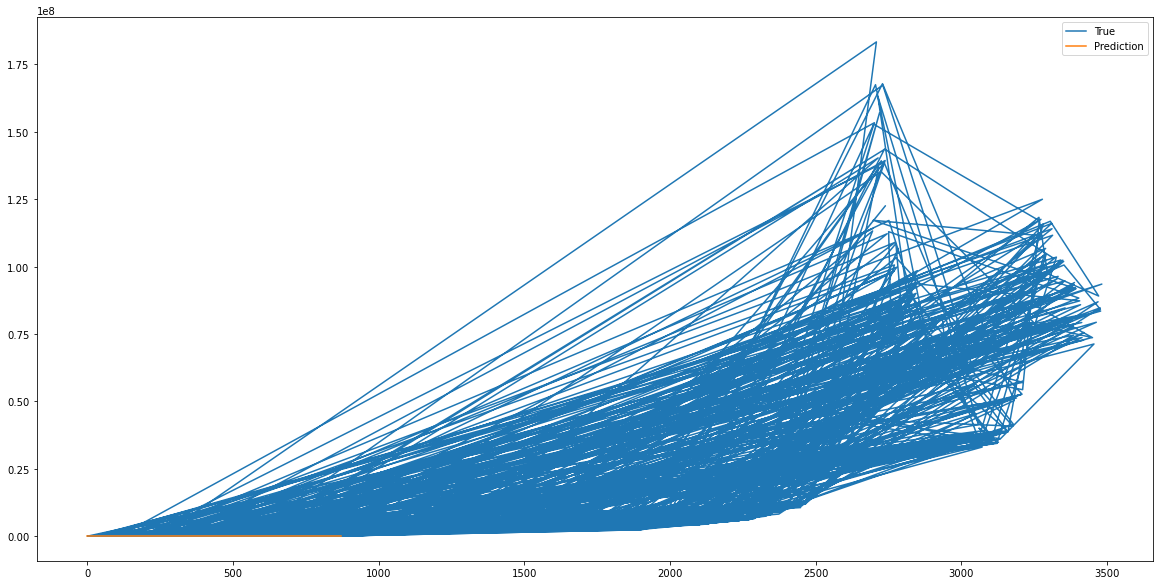

In [41]:
pred = svc.predict(X_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()